In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 64 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Assignment A: FullyConnected Autoencoder

1.Modify the code below to define an architecture [784 -> 256 -> 64 -> 256 -> 784]  

2.Add L2 cost function to optimize  

3.Visualize the reconstructions  

4.Run the network with different learning and plot loss curves (LR = 0.5, 0.1, 0.05, 0.01)  

5.Add Gaussian Noise (kernel with sd=0.05) to distort the input and run with LR = 0.01

In [2]:
a = tf.ones((5,12,224*224))
b = tf.zeros((5,12,224*224))
r = tf.reduce_mean(tf.reduce_sum(tf.square(a- b),[1,2]))
r

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [23]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])
# Add noise to X to use as denoising autoencoder
noise = tf.random_normal([n_input])
X_noise = tf.add(X, noise)

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder (Modify Encoder here)
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder (Modify decoder here)
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model

latent = encoder(X_noise)
decoder_op = decoder(latent)

# Add the architecture Here!!! Final Output of decoder is 'decoder_op'

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
# Add the cost function here as 'cost'
cost = tf.reduce_mean(tf.reduce_sum(tf.square(y_true - y_pred),1))

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [25]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")

    # Applying encode and decode over test set
    encode_decode = sess.run(
        y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

    # Estimate the test set cost here
    test_cost = tf.reduce_mean(tf.reduce_sum(tf.square(X - y_pred),1))
    
    
     # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()
    plt.waitforbuttonpress()

Epoch: 0001 cost= 111.686126709
Epoch: 0002 cost= 88.543563843
Epoch: 0003 cost= 94.219726562
Epoch: 0004 cost= 89.232376099
Epoch: 0005 cost= 82.567077637
Epoch: 0006 cost= 92.050033569
Epoch: 0007 cost= 82.198402405
Epoch: 0008 cost= 75.474494934
Epoch: 0009 cost= 72.391220093
Epoch: 0010 cost= 68.904602051
Epoch: 0011 cost= 72.178176880
Epoch: 0012 cost= 73.804351807
Epoch: 0013 cost= 69.483520508
Epoch: 0014 cost= 72.715232849
Epoch: 0015 cost= 68.500907898
Epoch: 0016 cost= 65.915359497
Epoch: 0017 cost= 65.446693420
Epoch: 0018 cost= 62.646011353
Epoch: 0019 cost= 66.647689819
Epoch: 0020 cost= 71.412506104
Optimization Finished!


KeyboardInterrupt: 

# Assignment B: Fully Connected Autoencoder

1.Modify the code below to define an architecture [784 -> 64 -> 784]

2.Add L1 + L2 cost function to optimize (Elastic Norm)

3.Add Batch Normalization layer in the encoder.

4.Visualize the reconstructions

5.Add Salt/Pepper Noise (p = 0.01) to distort the input and run with LR = 0.01

In [16]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 64 # 1st layer num features
#n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])
# Add noise to X to use as denoising autoencoder
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
    #'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input]))
    #'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder (Modify Encoder here)
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    mean, var = tf.nn.moments(layer_1, axis=0)
    batch_norm = tf.nn.batch_normalization(layer_1, mean, var, offset  = None, scale = None, variance_epsilon= 1e-5)
    # Encoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
    #                               biases['encoder_b2']))
    return batch_norm


# Building the decoder (Modify decoder here)
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
    #                               biases['decoder_b2']))
    return layer_1

# Construct model

# Add the architecture Here!!! Final Output of decoder is 'decoder_op'

latent = encoder(X)
decoder_op = decoder(latent)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
# Add the cost function here as 'cost'
L1 =  tf.reduce_mean(tf.norm((y_true - y_pred),ord = 1, axis =1))

L2 = tf.reduce_mean(tf.reduce_sum(tf.square(y_true - y_pred),1))
cost = tf.add(L1 ,L2)

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Epoch: 0001 cost= 178.394104004
Epoch: 0002 cost= 154.974060059
Epoch: 0003 cost= 115.728897095
Epoch: 0004 cost= 123.725532532
Epoch: 0005 cost= 117.533691406
Epoch: 0006 cost= 105.514419556
Epoch: 0007 cost= 98.992973328
Epoch: 0008 cost= 87.998764038
Epoch: 0009 cost= 86.165008545
Epoch: 0010 cost= 83.648101807
Optimization Finished!
visualizing sample :  0
visualizing sample :  1
visualizing sample :  2
visualizing sample :  3
visualizing sample :  4
visualizing sample :  5
visualizing sample :  6
visualizing sample :  7
visualizing sample :  8
visualizing sample :  9
Done!


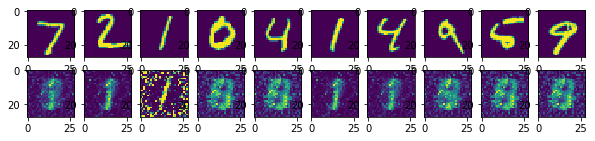

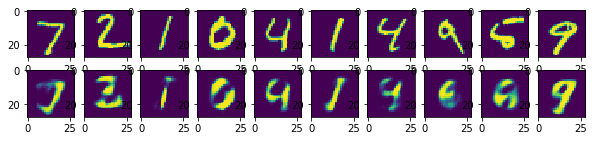

In [10]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
            
        # Display logs per epoch step
        #import pdb; pdb.set_trace()
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")
    # Applying encode and decode over test set

    encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

    # Estimate the test set cost here
    L1 =  tf.reduce_mean(tf.norm((X - y_pred),ord = 1, axis =1))
    L2 = tf.reduce_mean(tf.reduce_sum(tf.square(X - y_pred),1))
    test_cost = tf.add(L1 , L2)


    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        print("visualizing sample : ", i)
        #import pdb; pdb.set_trace()
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        #f.show()
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
        #f.show()
    f.show()
    print("Done!")
    plt.draw()
    #plt.waitforbuttonpress()
    plt.show()
    

# Assignment C: Convolutional Autoencoder

1.Modify the code below: Insert Batch Normalization for both encoder and decoders after convolutional layer.

2.Add Cost function L2

3.Write code to visualize the reconstructions and show them.

4.Change the Learning and report the loss curve (LR = 1e-4, 1e-6, 1e-8).

5.Add Gaussian Noise (kernel with sd=0.05) to distort the input and run with LR = 1e-6

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets('data/MNIST/', one_hot=True)

print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))



# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1


# Define the Placeholders
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
x_image = tf.pad(x_image, paddings=[[0,0],[2,2],[2,2],[0,0]], mode='CONSTANT') # Pad to make images 32*32
# Add noise to x_image to use as denoising autoencoder
y_true = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='y_true')
y_image = tf.reshape(y_true, [-1, img_size, img_size, num_channels])
y_image = tf.pad(y_image, paddings=[[0,0],[2,2],[2,2],[0,0]], mode='CONSTANT') # Pad to make images 32*32
print(y_image.get_shape())



def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))


def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))


# Modify Encoder Block here

def encoder_block(input,  # The previous layer.
                   num_input_channels,  # Num. channels in prev. layer.
                   filter_size,  # Width and height of filters.
                   num_filters,  # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    shape = [filter_size, filter_size, num_input_channels, num_filters]
    weights = new_weights(shape=shape)
    biases = new_biases(length=num_filters)
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    layer += biases
    layer = tf.nn.relu(layer)

    if use_pooling:
        # This is 2x2 max-pooling
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')


    return layer, weights


# Modify Decoder Block here

def decoder_block(input,  # The previous layer.
                  num_input_channels,  # Num. channels in prev. layer.
                  filter_size,  # Width and height of filters.
                  num_filters):  # Number of filters.

    shape = [filter_size, filter_size, num_input_channels, num_filters]
    h,w,c = input.get_shape().as_list()[1:]
    #print(sz[1])
    tr_weights = new_weights(shape=[2,2,num_input_channels, num_input_channels])
    tr_bias = new_biases(length=num_input_channels)
    weights = new_weights(shape=shape)
    biases = new_biases(length=num_filters)
    temp_batch_size = 32 #tf.shape(input).as_list()[0]
    out_sz = [temp_batch_size,2*h,2*w,c]
    layer = tf.nn.conv2d_transpose(value=input,
                             filter=tr_weights,
                             output_shape=out_sz,
                             strides=[1,2,2,1],
                             padding='VALID')

    layer += tr_bias
    layer = tf.nn.relu(layer)
    layer = tf.nn.conv2d(input=layer,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    layer += biases
    layer = tf.nn.relu(layer)

    return layer, weights, tr_weights


encoder1, w_e1 = encoder_block(input=x_image,
                       num_input_channels=num_channels,
                       filter_size=3,
                       num_filters=4,
                       use_pooling=True)

print(encoder1.get_shape())

encoder2, w_e2 = encoder_block(input=encoder1,
                       num_input_channels=4,
                       filter_size=3,
                       num_filters=8,
                       use_pooling=True)

print(encoder2.get_shape())

encoder3, w_e3 = encoder_block(input=encoder2,
                       num_input_channels=8,
                       filter_size=3,
                       num_filters=16,
                       use_pooling=True)

print(encoder3.get_shape())

bottleneck, wb = encoder_block(input=encoder3,
                       num_input_channels=16,
                       filter_size=3,
                       num_filters=16,
                       use_pooling=False)

print(bottleneck.get_shape())

decoder3, w_d3, trw_d3 = decoder_block(input = bottleneck,
                        num_input_channels = 16,
                        filter_size = 3,
                        num_filters = 8)

print(decoder3.get_shape())

decoder2, w_d2, trw_d2 = decoder_block(input = decoder3,
                        num_input_channels = 8,
                        filter_size = 3,
                        num_filters = 4)
print(decoder2.get_shape())


decoder1, w_d1, trw_d1 = decoder_block(input = decoder2,
                        num_input_channels = 4,
                        filter_size = 3,
                        num_filters = 2)
print(decoder1.get_shape())

regressor = tf.nn.conv2d(input=decoder1,
                         filter=new_weights(shape=[3,3,2,1]),
                         strides=[1, 1, 1, 1],
                         padding='SAME')
regressor += new_biases(length=1)

#a = tf.shape(input=regressor)

print(regressor.get_shape())


#### Cost Function Enter here #####

res = tf.add(regressor, -y_image)


# Enter Loss Function here as 'loss'

#####


optimizer = tf.train.AdamOptimizer(learning_rate=1e-6).minimize(loss)



# Saver
saver = tf.train.Saver()
save_dir = 'checkpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

save_path = os.path.join(save_dir, 'best_validation')

# Run Session
session = tf.Session()
session.run(tf.global_variables_initializer())
train_batch_size = 32

# Counter for total number of iterations performed so far.
total_iterations = 0

# Best validation accuracy seen so far.
best_validation_accuracy = 0.0

# Iteration-number for last improvement to validation accuracy.
last_improvement = 0

# Stop optimization if no improvement found in this many iterations.
require_improvement = 1000





def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations
    global best_validation_accuracy
    global last_improvement

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: x_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0 or (i == (num_iterations - 1)):
            # Calculate the accuracy on the training-set.
            acc = session.run(loss, feed_dict=feed_dict_train)

            # Save all variables of the TensorFlow graph to file.
            saver.save(sess=session, save_path=save_path)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Loss: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

# Assignment D: Convolutional Autoencoder

1.Modify the code below: Insert dropout layer for decoders after convolutional layer.

2.Add Cost function L2+L1 (Elastic Norm)

3.Write code to visualize the reconstructions and show them.

4.Change the Learning and report the loss curve (LR = 1e-4, 1e-6, 1e-8).

5.Add Salt/Pepper Noise (p = 0.01) to distort the input and run with LR = 1e-6

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets('data/MNIST/', one_hot=True)

print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))



# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1


# Define the Placeholders
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
x_image = tf.pad(x_image, paddings=[[0,0],[2,2],[2,2],[0,0]], mode='CONSTANT') # Pad to make images 32*32
# Add noise to x_image to use as denoising autoencoder
y_true = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='y_true')
y_image = tf.reshape(y_true, [-1, img_size, img_size, num_channels])
y_image = tf.pad(y_image, paddings=[[0,0],[2,2],[2,2],[0,0]], mode='CONSTANT') # Pad to make images 32*32
print(y_image.get_shape())



def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))


def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))


# Modify Encoder Block here

def encoder_block(input,  # The previous layer.
                   num_input_channels,  # Num. channels in prev. layer.
                   filter_size,  # Width and height of filters.
                   num_filters,  # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    shape = [filter_size, filter_size, num_input_channels, num_filters]
    weights = new_weights(shape=shape)
    biases = new_biases(length=num_filters)
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    layer += biases
    layer = tf.nn.relu(layer)

    if use_pooling:
        # This is 2x2 max-pooling
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')


    return layer, weights


# Modify Decoder Block here

def decoder_block(input,  # The previous layer.
                  num_input_channels,  # Num. channels in prev. layer.
                  filter_size,  # Width and height of filters.
                  num_filters):  # Number of filters.

    shape = [filter_size, filter_size, num_input_channels, num_filters]
    h,w,c = input.get_shape().as_list()[1:]
    #print(sz[1])
    tr_weights = new_weights(shape=[2,2,num_input_channels, num_input_channels])
    tr_bias = new_biases(length=num_input_channels)
    weights = new_weights(shape=shape)
    biases = new_biases(length=num_filters)
    temp_batch_size = 32 #tf.shape(input).as_list()[0]
    out_sz = [temp_batch_size,2*h,2*w,c]
    layer = tf.nn.conv2d_transpose(value=input,
                             filter=tr_weights,
                             output_shape=out_sz,
                             strides=[1,2,2,1],
                             padding='VALID')

    layer += tr_bias
    layer = tf.nn.relu(layer)
    layer = tf.nn.conv2d(input=layer,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    layer += biases
    layer = tf.nn.relu(layer)

    return layer, weights, tr_weights


encoder1, w_e1 = encoder_block(input=x_image,
                       num_input_channels=num_channels,
                       filter_size=3,
                       num_filters=4,
                       use_pooling=True)

print(encoder1.get_shape())

encoder2, w_e2 = encoder_block(input=encoder1,
                       num_input_channels=4,
                       filter_size=3,
                       num_filters=8,
                       use_pooling=True)

print(encoder2.get_shape())

encoder3, w_e3 = encoder_block(input=encoder2,
                       num_input_channels=8,
                       filter_size=3,
                       num_filters=16,
                       use_pooling=True)

print(encoder3.get_shape())

bottleneck, wb = encoder_block(input=encoder3,
                       num_input_channels=16,
                       filter_size=3,
                       num_filters=16,
                       use_pooling=False)

print(bottleneck.get_shape())

decoder3, w_d3, trw_d3 = decoder_block(input = bottleneck,
                        num_input_channels = 16,
                        filter_size = 3,
                        num_filters = 8)

print(decoder3.get_shape())

decoder2, w_d2, trw_d2 = decoder_block(input = decoder3,
                        num_input_channels = 8,
                        filter_size = 3,
                        num_filters = 4)
print(decoder2.get_shape())


decoder1, w_d1, trw_d1 = decoder_block(input = decoder2,
                        num_input_channels = 4,
                        filter_size = 3,
                        num_filters = 2)
print(decoder1.get_shape())

regressor = tf.nn.conv2d(input=decoder1,
                         filter=new_weights(shape=[3,3,2,1]),
                         strides=[1, 1, 1, 1],
                         padding='SAME')
regressor += new_biases(length=1)

#a = tf.shape(input=regressor)

print(regressor.get_shape())


#### Cost Function Enter here #####

res = tf.add(regressor, -y_image)


# Enter Loss Function here as 'loss'

#####


optimizer = tf.train.AdamOptimizer(learning_rate=1e-6).minimize(loss)



# Saver
saver = tf.train.Saver()
save_dir = 'checkpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

save_path = os.path.join(save_dir, 'best_validation')

# Run Session
session = tf.Session()
session.run(tf.global_variables_initializer())
train_batch_size = 32

# Counter for total number of iterations performed so far.
total_iterations = 0

# Best validation accuracy seen so far.
best_validation_accuracy = 0.0

# Iteration-number for last improvement to validation accuracy.
last_improvement = 0

# Stop optimization if no improvement found in this many iterations.
require_improvement = 1000





def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations
    global best_validation_accuracy
    global last_improvement

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: x_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0 or (i == (num_iterations - 1)):
            # Calculate the accuracy on the training-set.
            acc = session.run(loss, feed_dict=feed_dict_train)

            # Save all variables of the TensorFlow graph to file.
            saver.save(sess=session, save_path=save_path)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Loss: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))